In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from matplotlib import pyplot as plt

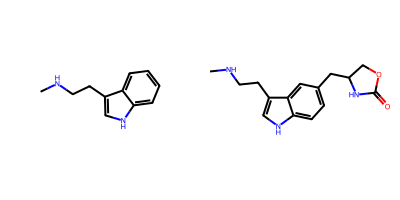

In [2]:
smiles = ["CNCCc1c[nH]c2ccccc12", "CNCCc1c[nH]c2ccc(CC3COC(=O)N3)cc12"]
# smiles = ["CNCCc1c[nH]c2ccccc12", "CNCCc1c[nH]c2ccc(CC)cc12"]
mols = [Chem.MolFromSmiles(s) for s in smiles]

# mol to grid
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))
img



## Calculate Edit Distance
you need to have the motif_mols.pkl file, if it is not available, you can get it with:

```python create_cache_files.py data/mols.csv data/motifs.csv nf_output_sample/cached_output```

In [3]:
from main_edit_distance import solve_pair
import pickle

motifs = "nf_output_sample/cached_output/motifs_mols.pkl"

with open(motifs, "rb") as f:
    motifs_mols = pickle.load(f)

print(len(motifs_mols))

929


Calculate the edit distance information

In [4]:
result = solve_pair(smiles[0], smiles[1], motifs_mols, important_columns=['motif_distance'])
print(result)

{'distance': 1, 'tanimoto': 0.4423076923076923, 'is_sub': True, 'added': 0, 'removed': 1, 'motif_distance': 1, 'motif_removed': 0, 'motif_added': 1}


## Visualize the result

for this section you need the modifinder package, if you don't have it already you can install it via `pip`:

`pip install modifinder`

In [5]:
from motif_base_edit_distance import get_min_motif_to_cover
import mol_utils as mu
from modifinder.utilities import visualizer as mf_vis

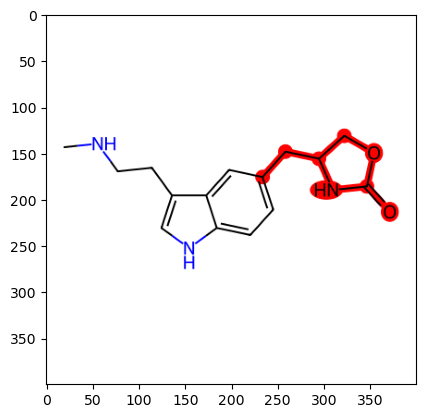

In [6]:

modifications = mu.get_modification_graph(mols[1], mols[0])
# print("modifications", modifications)
distance = 0
atomHighlightColors = {}
color_index = 0
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0), (1, 0, 1), (0, 1, 1)]
for modification in modifications:
    res, sections = get_min_motif_to_cover(modification[0], motifs_mols)
    atomHighlightColors = {}
    for (key, value) in sections.items():
        atom_index = modification[3][key]
        atomHighlightColors[atom_index] = colors[color_index + value]
    max_value = max(sections.values())
    color_index += max_value + 1


img = mf_vis.draw_molecule(mols[1], highlightAtoms = list(atomHighlightColors.keys()), highlightAtomColors=atomHighlightColors)
plt.imshow(img)

